###**Data**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
import pandas as pd
import re
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving remaining_test_data_without_sentiment_25.csv to remaining_test_data_without_sentiment_25.csv


In [ ]:
data = pd.read_csv('balanced_train_data.csv')

In [ ]:
data

,comment,sentiment
0,nice deed,1
1,big brain move president tremendous positive e...,1
2,suggestion use highprotein highfat ration like...,0
3,indonesian unlike majority people hope project...,1
4,medium professor whose think educate prabowo g...,1
...,...,...
70,another scam give child free food parent must ...,-1
71,privileged people wo nt understand important f...,0
72,watch food quality decline school steal money ...,-1
73,corruption make impossible happen even year 21...,-1


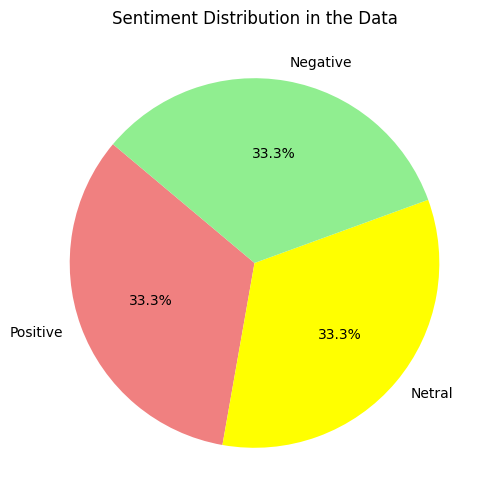

In [ ]:
sentiment_counts = data['sentiment'].value_counts()

labels = sentiment_counts.index.map({-1: 'Negative', 0 : 'Netral',1: 'Positive'})
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'yellow','lightgreen'])
plt.title('Sentiment Distribution in the Data')
plt.show()

###**PREPROCESSING**

In [ ]:
def clean_comment(comment):
  clean = re.compile('<.*?>')
  return re.sub(clean,'', comment)

In [ ]:
def remove_brackets(comment):
  return re.sub('\[[^]]*\]','', comment)

In [ ]:
def lower_cases(comment):
  return comment.lower()

In [ ]:
def remove_char(comment):
  pattern = r'[^a-zA-Z0-9\s]'
  comment = re.sub(pattern, '', comment)
  return comment

In [ ]:
def remove_noise(comment):
  comment = clean_comment(comment)
  comment = remove_brackets(comment)
  comment = lower_cases(comment)
  comment = remove_char(comment)
  return comment

In [ ]:
data['comment'] = data['comment'].apply(remove_noise)
data.head()

,comment,sentiment
0,what a nice deed,1
1,this be a big brain move from that president ...,1
2,my suggestion be use highprotein highfat ratio...,0
3,as indonesian unlike the majority of the peop...,1
4,the medium and the professor whose think have...,1


In [ ]:
    lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_words(comment):
    words = word_tokenize(comment)
    lemmatized_list = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(lemmatized_list)

data['comment'] = data['comment'].apply(lemmatize_words)
data.head(10)

,comment,sentiment
0,what a nice deed,1
1,this be a big brain move from that president t...,1
2,my suggestion be use highprotein highfat ratio...,0
3,a indonesian unlike the majority of the people...,1
4,the medium and the professor whose think have ...,1
5,this program be a relevant a a propaganda program,-1
6,they gon na have to scale it down there just n...,-1
7,honestly i m very optimistic about this progra...,1
8,hopefully the free nutritious meal program in ...,1
9,people mock they re slow and all this and that...,1


In [ ]:
stopword_list = set(stopwords.words('english'))

# removing the stopwords from review
def remove_stopwords(comment):
    # list to store filtered words
    filtered_text = []
    # iterate over each word in the text
    for word in comment.split():  # Memastikan text adalah string
        if word not in stopword_list:
            filtered_text.append(word)
    # return the filtered list of words
    return filtered_text

# Apply the remove_stopwords function to the 'text' column
data['comment'] = data['comment'].apply(remove_stopwords)

# join back all words as single paragraph
def join_back(text):
    return ' '.join(text)  # Menyatukan kembali list menjadi string

# Apply join_back function to rejoin words in each row
data['comment'] = data['comment'].apply(join_back)

# Check if changes are applied
data.head(100)

,comment,sentiment
0,nice deed,1
1,big brain move president tremendous positive e...,1
2,suggestion use highprotein highfat ration like...,0
3,indonesian unlike majority people hope project...,1
4,medium professor whose think educate prabowo g...,1
...,...,...
70,another scam give child free food parent must ...,-1
71,privileged people wo nt understand important f...,0
72,watch food quality decline school steal money ...,-1
73,corruption make impossible happen even year 21...,-1


###**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_tfidf = tfidf.fit_transform(data['comment']).toarray()

feature_names = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame(X_tfidf, columns=feature_names)

print(tfidf_df.head())

   2100   35   40  abuse  accomodate  activist  advantage  afford  agree  \
0   0.0  0.0  0.0    0.0         0.0       0.0        0.0     0.0    0.0   
1   0.0  0.0  0.0    0.0         0.0       0.0        0.0     0.0    0.0   
2   0.0  0.0  0.0    0.0         0.0       0.0        0.0     0.0    0.0   
3   0.0  0.0  0.0    0.0         0.0       0.0        0.0     0.0    0.0   
4   0.0  0.0  0.0    0.0         0.0       0.0        0.0     0.0    0.0   

   allow  ...   wo  wonder      work  workforce  worried  would  write  yeah  \
0    0.0  ...  0.0     0.0  0.000000        0.0      0.0    0.0    0.0   0.0   
1    0.0  ...  0.0     0.0  0.000000        0.0      0.0    0.0    0.0   0.0   
2    0.0  ...  0.0     0.0  0.000000        0.0      0.0    0.0    0.0   0.0   
3    0.0  ...  0.0     0.0  0.282237        0.0      0.0    0.0    0.0   0.0   
4    0.0  ...  0.0     0.0  0.000000        0.0      0.0    0.0    0.0   0.0   

   year  yes  
0   0.0  0.0  
1   0.0  0.0  
2   0.0  0.0  
3 

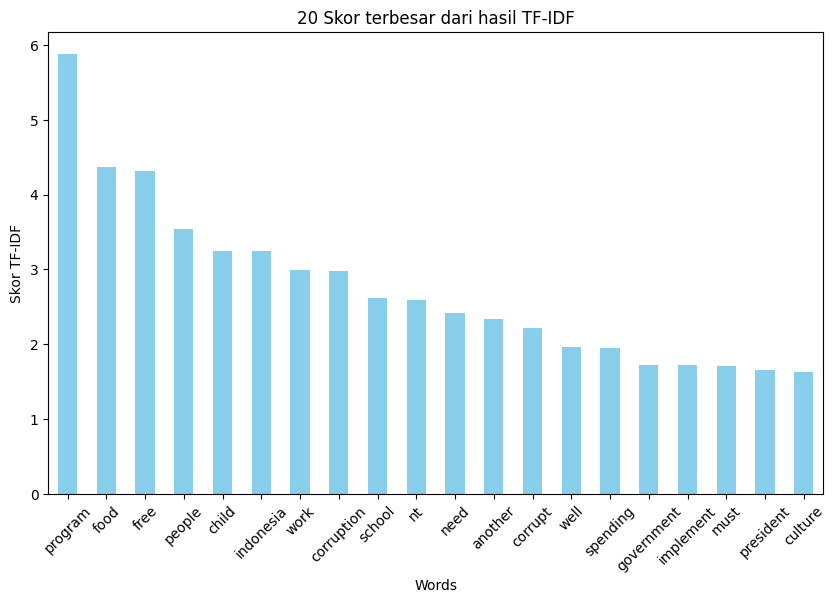

,0
program,5.878354
food,4.366937
free,4.309664
people,3.535688
child,3.242303
indonesia,3.242245
work,2.998459
corruption,2.978408
school,2.614148
nt,2.596063


In [ ]:
import matplotlib.pyplot as plt
tfidf_sorted = tfidf_df.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
tfidf_sorted.plot(kind='bar', color='skyblue')
plt.title('20 Skor terbesar dari hasil TF-IDF')
plt.ylabel('Skor TF-IDF')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()

tfidf_sorted.head(100)

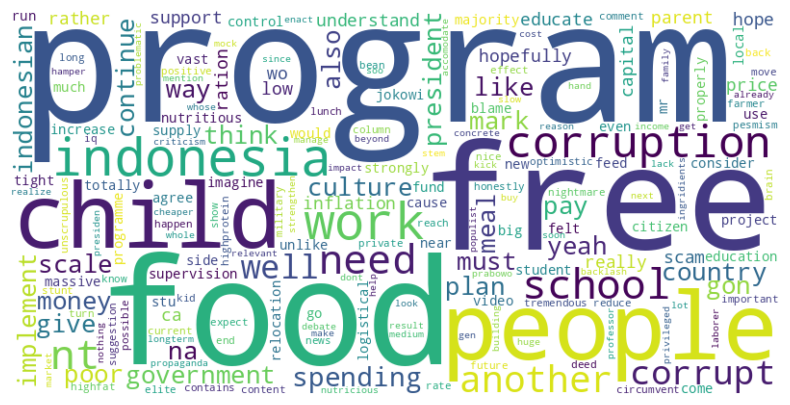

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_scores = tfidf_df.sum().sort_values(ascending=False)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

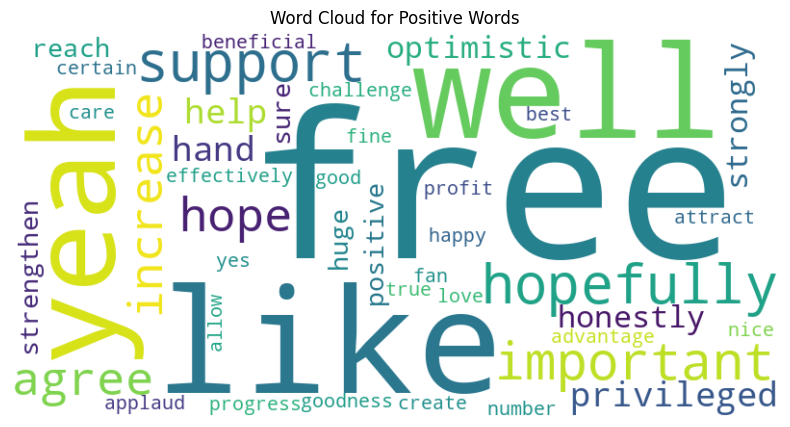

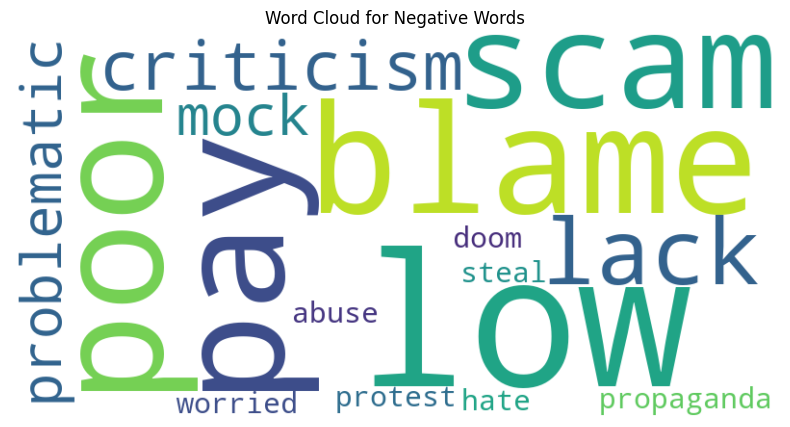

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Dictionaries for storing positive and negative words with scores
positive_words = {}
negative_words = {}

# Loop through each processed text
for text in data['comment']:
    words = text.split()
    for word in words:
        # Sentiment score for each word
        score = sia.polarity_scores(word)
        # Adjusted threshold for including words
        if score['pos'] > 0.1:
            positive_words[word] = positive_words.get(word, 0) + score['pos']
        elif score['neg'] > 0.1:
            negative_words[word] = negative_words.get(word, 0) + score['neg']

# Generate word cloud for positive words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Words')
plt.show()

# Generate word cloud for negative words
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Words')
plt.show()


###**NAIVE BAYES**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8666666666666667

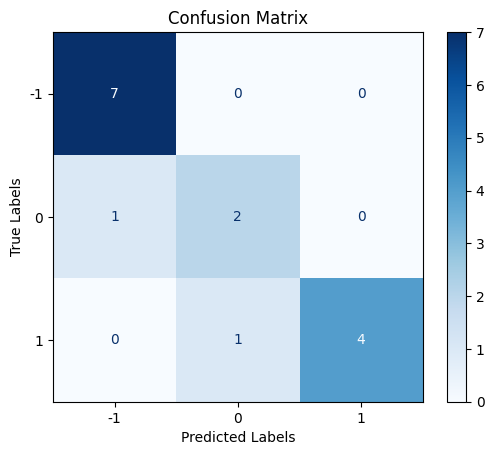

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix, display_labels=[-1, 0, 1]).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, target_names=['-1', '0','1'])
print(report)

              precision    recall  f1-score   support

          -1       0.88      1.00      0.93         7
           0       0.67      0.67      0.67         3
           1       1.00      0.80      0.89         5

    accuracy                           0.87        15
   macro avg       0.85      0.82      0.83        15
weighted avg       0.88      0.87      0.87        15



In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
vectorizer_file = open("vectorizer.b", "wb")
pickle.dump(tfidf, vectorizer_file)
nb_file = open("nb.b","wb")
pickle.dump(nb_model, nb_file)
vectorizer_file.close()
nb_file.close()

###**LABELING**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving remaining_test_data_without_sentiment.csv to remaining_test_data_without_sentiment.csv


In [ ]:
nldf = pd.read_csv('remaining_test_data_without_sentiment.csv')

In [ ]:
nldf

,comment
0,Wow awesome work guys
1,this need so many supervision or this will fai...
2,"in my opinion as Indonesian, this project will..."
3,If the program implemented correctly this will...
4,"If India can do it, Indonesia can do it too. H..."
5,Many Indonesian foods were not optimized for n...
6,I am indonesian and I do not trust this program
7,Indonesia is in critical situation. Poverty in...
8,"As an Indonesian, it's more like an irony how ..."
9,It's never free because they used external deb...


In [ ]:
nldf['comment'] = nldf['comment'].apply(remove_noise)
nldf['comment'] = nldf['comment'].apply(lemmatize_words)
nldf['comment'] = nldf['comment'].apply(remove_stopwords)
nldf['comment'] = nldf['comment'].apply(join_back)

In [ ]:
nldf

,comment
0,wow awesome work guy
1,need many supervision faild always much corrup...
2,opinion indonesian project full corruption
3,program implement correctly huge success
4,india indonesia hope succeed
5,many indonesian food optimize nutrition practi...
6,indonesian trust program
7,indonesia critical situation poverty increase ...
8,indonesian like irony parent force go school f...
9,never free use external debt payment


In [ ]:
nldf['sentiment'] = None

In [ ]:
nldf

,comment,sentiment
0,wow awesome work guy,None
1,need many supervision faild always much corrup...,None
2,opinion indonesian project full corruption,None
3,program implement correctly huge success,None
4,india indonesia hope succeed,None
5,many indonesian food optimize nutrition practi...,None
6,indonesian trust program,None
7,indonesia critical situation poverty increase ...,None
8,indonesian like irony parent force go school f...,None
9,never free use external debt payment,None


In [ ]:
tobelabel = tfidf.transform(nldf['comment'])
labeling = nb_model.predict(tobelabel)
nldf['sentiment'] = labeling
print(nldf.head(100))

                                              comment  sentiment
0                                wow awesome work guy         -1
1   need many supervision faild always much corrup...         -1
2          opinion indonesian project full corruption          1
3            program implement correctly huge success          1
4                        india indonesia hope succeed          1
5   many indonesian food optimize nutrition practi...          0
6                            indonesian trust program          1
7   indonesia critical situation poverty increase ...          1
8   indonesian like irony parent force go school f...          0
9                never free use external debt payment          0
10  program would hurt indonesian growth like indo...          0
11                                new corrupt scandal          1
12  people happy program doesnt seem realize there...          1
13  give poor food would make rely feel thankful g...         -1
14  free food every day c

In [ ]:
nldf.to_csv('labeled_test_data_25.csv', index=False)

###**COMPARING DATA**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving remaining_test_data.csv to remaining_test_data.csv


In [ ]:
cdf = pd.read_csv('remaining_test_data.csv')

In [ ]:
cdf['comment'] = cdf['comment'].apply(remove_noise)
cdf['comment'] = cdf['comment'].apply(lemmatize_words)
cdf['comment'] = cdf['comment'].apply(remove_stopwords)
cdf['comment'] = cdf['comment'].apply(join_back)

In [ ]:
cdf

,comment,sentiment
0,wow awesome work guy,1
1,need many supervision faild always much corrup...,0
2,opinion indonesian project full corruption,-1
3,program implement correctly huge success,1
4,india indonesia hope succeed,1
5,many indonesian food optimize nutrition practi...,0
6,indonesian trust program,-1
7,indonesia critical situation poverty increase ...,1
8,indonesian like irony parent force go school f...,0
9,never free use external debt payment,-1


In [ ]:
ldf = pd.read_csv('labeled_test_data_25.csv')
ldf

,comment,sentiment
0,wow awesome work guy,-1
1,need many supervision faild always much corrup...,-1
2,opinion indonesian project full corruption,1
3,program implement correctly huge success,1
4,india indonesia hope succeed,1
5,many indonesian food optimize nutrition practi...,0
6,indonesian trust program,1
7,indonesia critical situation poverty increase ...,1
8,indonesian like irony parent force go school f...,0
9,never free use external debt payment,0


In [ ]:
accuracy = accuracy_score(cdf['sentiment'], ldf['sentiment'])
accuracy

0.44

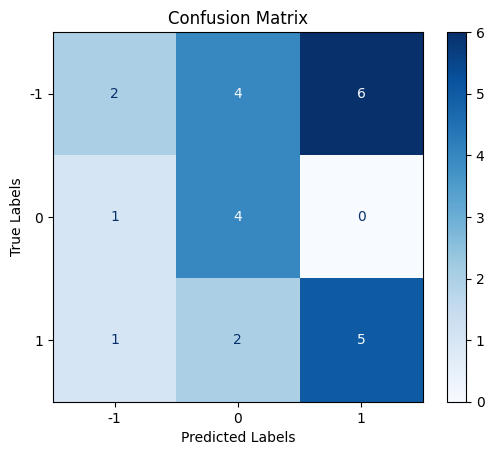

In [ ]:
cm = confusion_matrix(cdf['sentiment'], ldf['sentiment'])

# Display the confusion matrix
ConfusionMatrixDisplay(cm, display_labels=[-1, 0, 1]).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
report = classification_report(cdf['sentiment'], ldf['sentiment'], target_names=['-1', '0','1'])
print(report)

              precision    recall  f1-score   support

          -1       0.50      0.17      0.25        12
           0       0.40      0.80      0.53         5
           1       0.45      0.62      0.53         8

    accuracy                           0.44        25
   macro avg       0.45      0.53      0.44        25
weighted avg       0.47      0.44      0.40        25



###COMBINING

In [ ]:
tdf = pd.read_csv('balanced_train_data.csv')

In [ ]:
tdf['comment'] = tdf['comment'].apply(remove_noise)
tdf['comment'] = tdf['comment'].apply(lemmatize_words)
tdf['comment'] = tdf['comment'].apply(remove_stopwords)
tdf['comment'] = tdf['comment'].apply(join_back)

In [ ]:
combining = pd.concat([tdf, ldf], axis=0).sample(frac=1).reset_index(drop=True)

In [ ]:
combining

,comment,sentiment
0,rather money corrupt well feed child,0
1,suggestion use highprotein highfat ration like...,0
2,yeah long reach school need elite private scho...,0
3,big brain move president tremendous positive e...,1
4,another scam give child free food parent must ...,-1
...,...,...
95,free food free corruption,-1
96,medium professor whose think educate prabowo g...,1
97,opinion indonesian project full corruption,1
98,indonesia critical situation poverty increase ...,1


In [ ]:
x = tfidf.fit_transform(combining.comment)
y = combining['sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
labeling = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = labeling.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.95

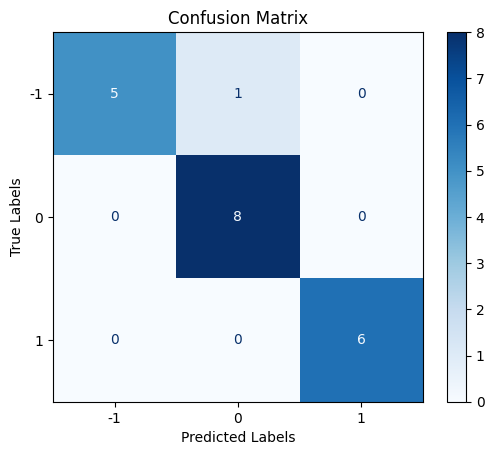

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[-1, 0, 1])
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred, target_names=['-1', '0','1'])
print(report)

              precision    recall  f1-score   support

          -1       1.00      0.83      0.91         6
           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.96      0.95      0.95        20

